# Can we predict the presence of heart disease based upon clinical variables? # 
===================================================================================================================  
In this Jupyter Notebook, we perform an exploratory data analysis on a dataset containing various clinical variables related to heart disease. Our goal is to answer the following data science question: 

**Can we predict the presence of heart disease based upon these clinical variables?** 

To achieve this, we carry out an exploratory data analysis and then compare the performance of three popular predictive learning models: Random Forest, Decision Tree, and Logistic Regression. We use visualisation to explore the dataset and then evaluate the accuracy and efficiency of each model in predicting heart disease. The outcome of this analysis will provide a better understanding of the strengths and limitations of each approach in predicting heart disease based on clinical variables. ===================================================================================================================

In [37]:
# Data analysis imports 
import pandas as pd
import numpy as np

# Visualisation imports 
import seaborn as sns
import matplotlib.pyplot as plt

# Dimensionality reduction imports 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

# Data preprocessing imports 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Supervised learning module imports 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Classification and confusion matric imports 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

===============================
## Data inspection & cleansing

In [38]:
# Load dataset
df = pd.read_csv("/kaggle/input/predicting-heart-disease-risk-using-clinical-var/Heart_Disease_Prediction.csv")
df.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [39]:
# Column names 
df.columns

Index(['index', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')

In [40]:
# Number of columns and rows before data cleansing
row_num = df.shape[0]
column_num = df.shape[1]

print(f"There are {row_num} rows and {column_num} colums")

There are 270 rows and 15 colums


In [41]:
# Columns that are missing data

missing_values_count = df.isnull().sum()
missing_values_count

index                      0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [42]:
# Duplicated data 

duplicated_rows = df[df.duplicated()]

if not duplicated_rows.empty:
    print(duplicated_rows)
else: 
    print("There are no duplicated rows in dataframe!")

There are no duplicated rows in dataframe!


In [43]:
# Remove 'index' column
columns_to_remove = ['index']

df.drop(columns_to_remove, axis=1, inplace=True)

In [44]:
# Statistical methods to describe the data
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [45]:
# Column types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [46]:
# Number of unique values in each column 
df.nunique()

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

=======================================
## Summary of data inspection: 
#### - 270 rows and 15 columns (14 columns after 'index' was removed)
#### - No missing data
#### - No duplicated rows in dataframe
=======================================

## Univariate Analysis

==========================
## Features: Numeric variables
### - Age
### - BP
### - Cholesterol
### - Max HR 
### - ST Depression
==========================

<Figure size 720x720 with 0 Axes>

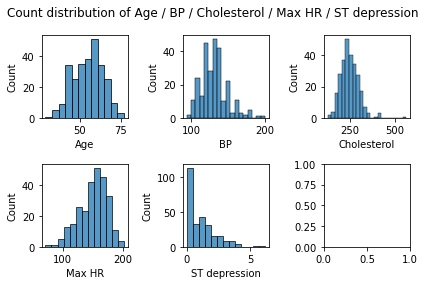

In [47]:
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(2,3)

sns.histplot(data=df, x="Age",ax=ax[0, 0])
sns.histplot(data=df, x="BP",ax=ax[0, 1])
sns.histplot(data=df, x="Cholesterol",ax=ax[0, 2])
sns.histplot(data=df, x="Max HR",ax=ax[1, 0])
sns.histplot(data=df, x="ST depression",ax=ax[1, 1])

plt.suptitle("Count distribution of Age / BP / Cholesterol / Max HR / ST depression")
plt.tight_layout()

=========================
## Features: Categorical variables
### - Sex 
### - EKG results 
### - Exercise Angina
### - Slope of ST
### - FBS over 120
### - Number of vessels fluoro
### - Chest pain type
### - Thallium
=========================

<Figure size 2880x2880 with 0 Axes>

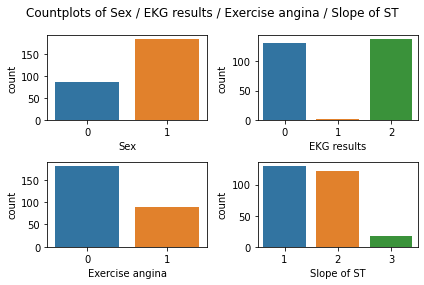

In [48]:
plt.figure(figsize=(40, 40))

fig, ax = plt.subplots(2,2)

sns.countplot(x=df["Sex"], ax=ax[0, 0])

sns.countplot(x=df["EKG results"], ax=ax[0, 1])

sns.countplot(x=df["Exercise angina"], ax=ax[1, 0])

sns.countplot(x=df["Slope of ST"], ax=ax[1, 1])

plt.suptitle("Countplots of Sex / EKG results / Exercise angina / Slope of ST")
plt.tight_layout()

<Figure size 2880x2880 with 0 Axes>

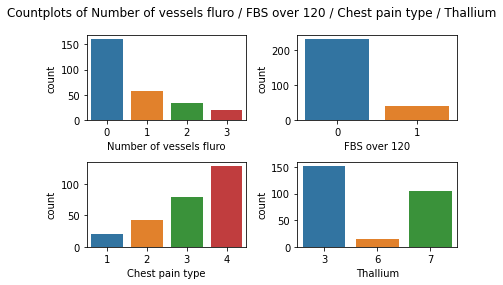

In [49]:
plt.figure(figsize=(40, 40))

fig, ax = plt.subplots(2,2)

sns.countplot(x=df["Number of vessels fluro"], ax=ax[0, 0])

sns.countplot(x=df["FBS over 120"], ax=ax[0, 1])

sns.countplot(x=df["Chest pain type"], ax=ax[1, 0])

sns.countplot(x=df["Thallium"], ax=ax[1, 1])

plt.suptitle("Countplots of Number of vessels fluro / FBS over 120 / Chest pain type / Thallium")

plt.tight_layout()

=======================================
## Target: Presence of heart disease
=======================================

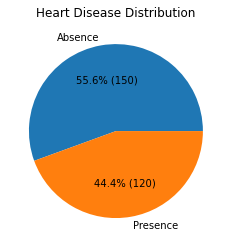

In [50]:
df["Heart Disease"].value_counts()
counts = df["Heart Disease"].value_counts().to_dict()
total = sum(counts.values())

fig, ax = plt.subplots()
ax.pie(counts.values(), labels=counts.keys(), autopct=lambda pct: '{:.1f}% ({:d})'.format(pct, int(pct*total/100)))
ax.set_title("Heart Disease Distribution")

plt.show()


=============================
## Bivariate analysis
=============================

### Scatter plots: Age vs BP / Cholesterol / Max HR / ST Depression

Coefficient of 'Age' and 'BP' = 0.27
Coefficient of 'Age' and 'Cholesterol' = 0.22
Coefficient of 'Age' and 'Max HR' = -0.4
Coefficient of 'Age' and 'ST depression' = 0.19


<Figure size 720x720 with 0 Axes>

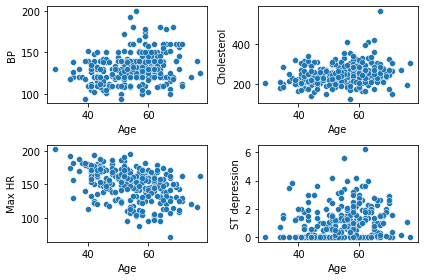

In [51]:
plt.figure(figsize=(10, 10))
fig, ax =plt.subplots(2, 2)

sns.scatterplot(data=df, x="Age", y="BP", ax=ax[0, 0])

sns.scatterplot(data=df, x="Age", y="Cholesterol", ax=ax[0, 1])
sns.scatterplot(data=df, x="Age", y="Max HR", ax=ax[1, 0])
sns.scatterplot(data=df, x="Age", y="ST depression", ax=ax[1, 1])

continuous_variables = ['BP', 'Cholesterol', 'Max HR', 'ST depression']
for i in continuous_variables: 
    print(f"Coefficient of 'Age' and '{i}' = {round(df['Age'].corr(df[i]), 2)}")

plt.tight_layout()

### Countplots: Sex vs Average Age / BP / Cholesterol / Max HR / ST Depression

<Figure size 3600x3600 with 0 Axes>

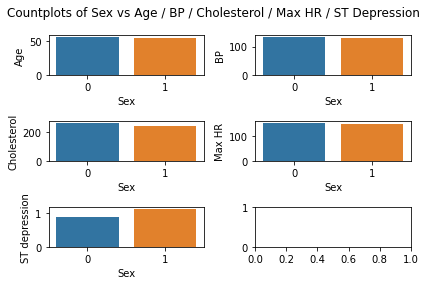

In [52]:
categorical_variables = ['EKG results', 'Exercise angina', 'Slope of ST', 'FBS over 120', 'Number of vessels fluro', 'Chest pain type']
sex_groupby = df.groupby(by=['Sex'])
sex_df = sex_groupby.mean(numeric_only=True).drop(columns=categorical_variables)

plt.figure(figsize=(50, 50))
fig, ax =plt.subplots(3, 2)

sns.barplot(data=sex_df, x=sex_df.index, y=sex_df['Age'], ax=ax[0, 0])
sns.barplot(data=sex_df, x=sex_df.index, y=sex_df['BP'], ax=ax[0, 1])
sns.barplot(data=sex_df, x=sex_df.index, y=sex_df['Cholesterol'], ax=ax[1, 0])
sns.barplot(data=sex_df, x=sex_df.index, y=sex_df['Max HR'], ax=ax[1, 1])
sns.barplot(data=sex_df, x=sex_df.index, y=sex_df['ST depression'], ax=ax[2, 0])


plt.suptitle("Countplots of Sex vs Age / BP / Cholesterol / Max HR / ST Depression")


plt.tight_layout()

### Boxplots: Chest pain type vs Cholesterol

<Figure size 3600x3600 with 0 Axes>

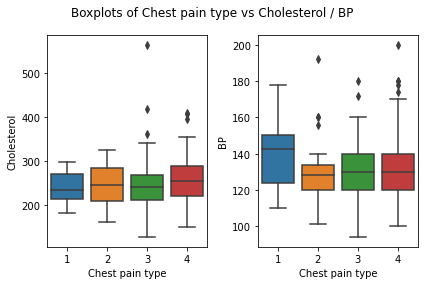

In [53]:
plt.figure(figsize=(50, 50))
fig, ax =plt.subplots(1, 2)

sns.boxplot(data=df, x="Chest pain type", y="Cholesterol", ax=ax[0])
sns.boxplot(data=df, x="Chest pain type", y="BP", ax=ax[1])

plt.suptitle("Boxplots of Chest pain type vs Cholesterol / BP")

plt.tight_layout()

### Pairplot analysis of all numeric variables

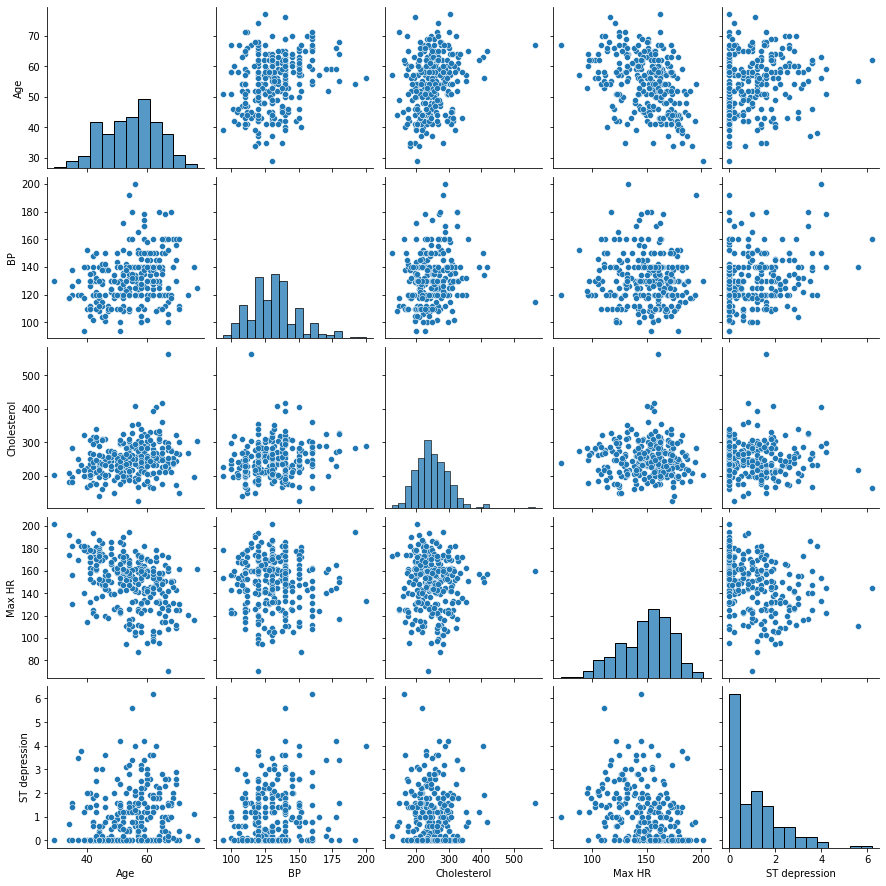

In [54]:
sns.pairplot(df[['Age', 'BP','Cholesterol','Max HR', 'ST depression']])

============================
## Feature heatmap 

<AxesSubplot:>

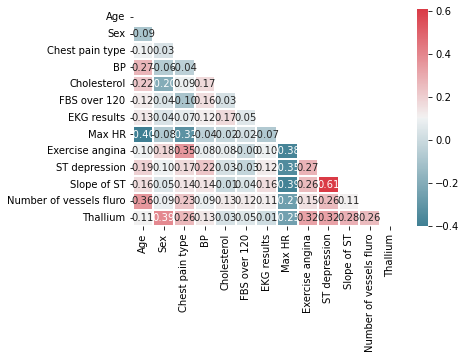

In [55]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

# Get correlations
corr_df = df.corr()

# to mask mirrored side of heatmap
dropSelf = np.zeros_like(corr_df)
dropSelf[np.triu_indices_from(dropSelf)] = True

# Generate heatmap with annotations of the correlation strength and 2 decimal floats 
sns.heatmap(corr_df, cmap=colormap, mask=dropSelf, annot=True, fmt=".2f", linewidth=2)

=============================
## Multivariate analysis
=============================

In [56]:
## Convert categorical variable column to continuous variable column using ordinal encoding

encoder = {'Presence': 1,'Absence': 2}
df['Heart Disease'] = df['Heart Disease'].map(encoder)

=============================
### PCA (Primary Component Analysis) 
=============================

In [57]:
pca = PCA()

x = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].values

# Apply dimensional reduction to the features and store in dataframe 
x_trans = pca.fit_transform(x)
df_pca = pd.DataFrame(x_trans)

df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,73.174199,40.678700,-9.044209,6.568873,-2.000472,1.694613,-0.233011,-0.994412,1.151103,-0.217374,0.029356,-0.799421,-0.260795
1,312.595070,-17.257890,-35.685770,7.131965,2.610276,0.111596,0.766594,1.736967,-0.934816,0.293306,0.505324,-0.130908,-0.064487
2,11.012929,8.044757,-8.662491,1.699980,1.667230,-2.102696,0.710783,1.335478,0.252884,-0.410725,0.282684,-0.137822,-0.106811
3,14.026263,44.889875,-7.981572,1.906766,1.111341,-2.103354,0.022799,-0.292741,-0.190088,0.341355,-0.494601,0.044234,-0.274460
4,19.673079,30.065854,-13.364129,15.355144,-2.487313,-0.509113,-0.704019,1.203480,0.589510,-0.300192,-0.065978,1.065604,-0.113365


In [58]:
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [51.83643686 23.53024278 17.64201483  7.68896525  1.92660946  1.0866921
  0.95440761  0.89396011  0.80609302  0.44965139  0.42388244  0.37960319
  0.33760483]


In [59]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [7.42486690e-01 1.52992875e-01 8.60032287e-02 1.63363183e-02
 1.02566554e-03 3.26310773e-04 2.51701716e-04 2.20828272e-04
 1.79551366e-04 5.58689205e-05 4.96488565e-05 3.98178763e-05
 3.14945702e-05]


In [60]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [2687.01618682 3240.68851191 3551.92919926 3611.0493859  3614.76120991
 3615.94210964 3616.85300352 3617.6521682  3618.30195417 3618.50414054
 3618.68381687 3618.82791545 3618.94189247]


In [61]:
labels = df.columns
index = df.index.values

In [62]:
# Function generates a biplot 
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

#     for i in range(0,len(xs)):
#         txt = index[i]
#         ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

    # Adapted from: https://ostwalprasad.github.io/machine-learning/PCA

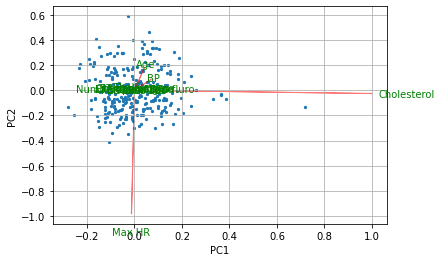

In [63]:
biplot(x_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(index))
plt.show()

==================================
Interestingly Cholesterol and Max HR dominate PC1 and PC2 respectively although it is acknowledged that this is typically an unsupervised learning technique
==================================

Text(0.5, 1.0, 'Cumulative Explained Variance')

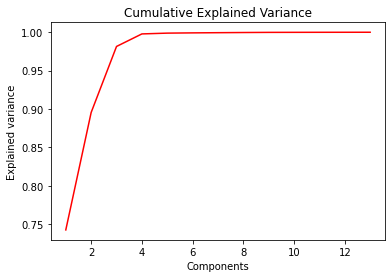

In [64]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

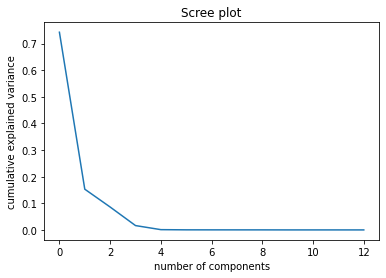

In [65]:
# Scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

=============================
### The first 3 components are responsible for over 90% of the variance
=============================

## Modelling with Logistic regression / Decision Tree / Random forest

=============================
### Logistic regression
=============================

In [66]:
x = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].values
y = df.iloc[:,13].values

x = x.reshape(-1, 13)
x = preprocessing.scale(x) #scale the data so that it is easier to fit

X_train, X_test, y_train, y_test = train_test_split(x, 
                y, test_size=0.25, random_state=0)


In [67]:
# fit a model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# make predictions on test data
y_pred = log_reg.predict(X_test).reshape(-1,1)

In [68]:
### Report accuracy, precision, recall and f1 score 

# Calculate the class by class precision, recall and f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.79      0.76        28
           2       0.84      0.80      0.82        40

    accuracy                           0.79        68
   macro avg       0.79      0.79      0.79        68
weighted avg       0.80      0.79      0.80        68



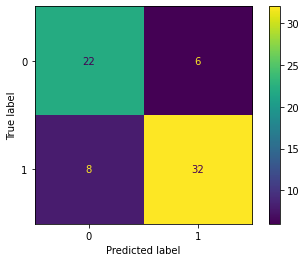

In [69]:
# Confusion matric generated by Logistic regression model 
conf_mat = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(conf_mat)
display.plot()

=============================
### Decision tree
=============================

In [70]:
xdt = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].values
ydt = df.iloc[:,13].values

In [71]:
X_train, X_test, y_train, y_test = train_test_split(xdt, 
                ydt, test_size=0.25, random_state=0)

In [72]:
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=0)
unpruned.fit(X_train, y_train)
print("Performance without pruning:", unpruned.score(X_test, y_test))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.7352941176470589
At depth: 8


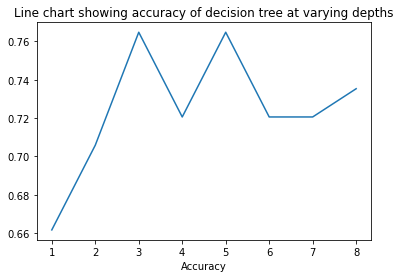

In [73]:
# looking at effect of pruning   
pruned_depths = range(1,unpruned.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=0)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
plt.title("Line chart showing accuracy of decision tree at varying depths")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

### Best performance was at depth 3 and 5 

In [74]:
# Best depth at 5 
five_depth = DecisionTreeClassifier(max_depth=5, random_state=0)
five_depth.fit(X_train, y_train)
print("Performance at depth 5:", five_depth.score(X_test, y_test))
print("At depth:", five_depth.tree_.max_depth)

Performance at depth 5: 0.7647058823529411
At depth: 5


=============================
### Random forest
=============================

In [75]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

feature_imp = pd.Series(rf.feature_importances_)
feature_imp.index = df.columns[:13]

### Features ranked in order of importance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Chest pain type'),
  Text(1, 0, 'ST depression'),
  Text(2, 0, 'Thallium'),
  Text(3, 0, 'Number of vessels fluro'),
  Text(4, 0, 'Max HR'),
  Text(5, 0, 'Age'),
  Text(6, 0, 'Cholesterol'),
  Text(7, 0, 'BP'),
  Text(8, 0, 'Exercise angina'),
  Text(9, 0, 'Slope of ST'),
  Text(10, 0, 'Sex'),
  Text(11, 0, 'EKG results'),
  Text(12, 0, 'FBS over 120')])

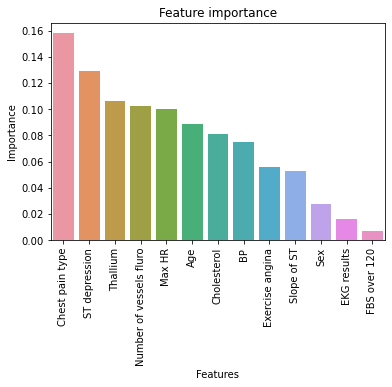

In [76]:
feature_imp.sort_values(ascending=False)
imp_feat = feature_imp.sort_values(ascending=False)
# Create graph to visualise importance
sns.barplot(x=imp_feat.index, y=imp_feat.values)

# Adding labels and title
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature importance")
plt.xticks(rotation=90)

### Generating predictive models with the least important features removed

In [77]:
# Bottom 3 features: 1. FBS over 120, 2. EKG results, 3. Sex 
new_x_missing_0 = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].values
new_x_missing_1 = df.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12]].values
new_x_missing_2 = df.iloc[:,[0,1,2,3,4,7,8,9,10,11,12]].values
new_x_missing_3 = df.iloc[:,[0,2,3,4,7,8,9,10,11,12]].values

new_y = df.iloc[:,13].values

In [78]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(new_x_missing_0, new_y, test_size=0.25, random_state=0)
X_train1, X_test1, y_train1, y_test1 = train_test_split(new_x_missing_1, new_y, test_size=0.25, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(new_x_missing_2, new_y, test_size=0.25, random_state=0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(new_x_missing_3, new_y, test_size=0.25, random_state=0)

In [79]:
def dropped_features_model(features, target, x_test, y_test):
    
    random_forest = RandomForestClassifier(random_state=0)
    random_forest.fit(features, target)
        
    score = random_forest.score(x_test, y_test)
    return score

In [80]:
list_of_features = [X_train0, X_train1, X_train2, X_train3]

print("Score with no features dropped is: ", dropped_features_model(X_train0, y_train0, X_test0, y_test0))
print("Score with bottom 1 feature dropped is: ", dropped_features_model(X_train1, y_train1, X_test1, y_test1))
print("Score with bottom 2 features dropped is: ", dropped_features_model(X_train2, y_train2, X_test2, y_test2))
print("Score with bottom 3 features dropped is: ", dropped_features_model(X_train3, y_train3, X_test3, y_test3))

Score with no features dropped is:  0.7941176470588235
Score with bottom 1 feature dropped is:  0.8235294117647058
Score with bottom 2 features dropped is:  0.8235294117647058
Score with bottom 3 features dropped is:  0.8235294117647058


============================
### Accuracy is better with the bottom 1-3 features dropped 
============================

### Tune hyperparameters:

In [81]:
# Function that prints value of n_estimators and max_depth that leads to the highest accuracy 
def random_forest_tuning(x_training, y_training, x_testing, y_testing):
    
    n_values = []
    score_list = []
    max_depth_list = []
    
    # For values of n from 1 - 100, create a random forest model with
    # variable 'n_estimators' and 'max_depth' values and calculate the accuracy 
    for n in range(1, 101):
        
        random_forest = RandomForestClassifier(n_estimators=n, random_state=0, max_depth=n)
        random_forest.fit(x_training, y_training)
        
        score = random_forest.score(x_testing, y_testing)
        
        score_list.append(score)
        max_depth_list.append(n)
        n_values.append(n)
        
    # Find the most accurate model and it's 'n_estimators'/'max_depth' value
    best_score = max(score_list)
    best_score_index = score_list.index(best_score)
    
    best_max = max_depth_list[best_score_index]
    best_n = n_values[best_score_index]
    
    print("Best accuracy is: ", best_score)
    print("Best 'n_estimator' values is: ", best_n)
    print("Best max_depth is: ", best_max)

In [82]:
random_forest_tuning(X_train1, y_train1, X_test1, y_test1)

Best accuracy is:  0.8529411764705882
Best 'n_estimator' values is:  71
Best max_depth is:  71


### Best accuracy is with an n_estimator and max_depth value of 71

In [83]:
### Split the data into training, development and test set 

x_train_final, x_test_final, y_train_final, y_test_final = train_test_split(new_x_missing_1, ydt, test_size=0.25, random_state=0)
x_train_final, x_val, y_train_final, y_val = train_test_split(x_train_final, y_train_final, test_size=0.25, random_state=0)

In [84]:
random_forest = RandomForestClassifier(n_estimators=71, random_state=0, max_depth=71)
random_forest.fit(x_train_final, y_train_final)

RandomForestClassifier(max_depth=71, n_estimators=71, random_state=0)

In [85]:
# Accuracy on validation data 
random_forest.score(x_val, y_val)

0.7647058823529411

In [86]:
# Accuracy on test data 
random_forest.score(x_test_final, y_test_final)

0.7794117647058824

In [87]:
# Function that prints value of n_estimators that leads to the highest accuracy 
def bagged_tuning(x_training, y_training, x_testing, y_testing):
    
    n_values = []
    score_list = []
    
    
    # For values of n from 1 - 100, create a bagged tree model with
    # variable 'n_estimators' values and calculate the accuracy 
    for n in range(1, 101):
        
        bagged_tree = BaggingClassifier(base_estimator=random_forest, n_estimators=n, random_state=0)
        bagged_tree.fit(x_training, y_training)
        
        score = bagged_tree.score(x_testing, y_testing)
        
        score_list.append(score)
        n_values.append(n)
        
    # Find the most accurate model and it's 'n_estimators' value
    best_score = max(score_list)
    best_score_index = score_list.index(best_score)

    best_n = n_values[best_score_index]
    
    print("Best accuracy is: ", best_score)
    print("Best 'n_estimator' values is: ", best_n)
    print("The Bagging classifier does not have a parameter for max_depth")

In [ ]:
bagged_tuning(x_train_final, y_train_final, x_test_final, y_test_final)

========================================================================
# Conclusion: 
## Most important features in predicting heart disease are:
### - Chest Pain type
### - ST Depression
### - Thallium stress test results
=========================================================================
## Best predictive model performance: 
# Random forest model with the 3 least important features removed: 
### - FBS over 120
### - EKG results
### - Sex 

## Approx 80% accuracy
## Enhanced with bagging method

This was my first machine learning project! Please upvote and leave any helpful comments or points of learning! 